# Calling the cleaned dataframe from the respective notebook

In [82]:
import pandas as pd

travel_trip_complete_hoaithuong_df = pd.read_parquet("../data/clean/travel_trip_complete.parquet", engine="fastparquet")
travel_trip_complete_hoaithuong_df

,destination,trip_id,destination_country,destination_city,start_date,end_date,duration_days,traveler_name,traveler_age,traveler_gender,...,accommodation_cost,transportation_type,transportation_cost,end_year,end_month,start_year,start_month,start_month_name,end_month_name,traveler_nationality_clean
0,"London, UK",1,UK,London,2023-05-01,2023-05-01,7.0,john smith,35.0,Male,...,1200,Flight,600.0,2023,5,2023,5,May,May,United States
1,"Phuket, Thailand",2,Thailand,Phuket,2023-06-01,2023-06-01,5.0,jane doe,28.0,Female,...,800,Flight,500.0,2023,6,2023,6,June,June,Canada
2,"Bali, Indonesia",3,Indonesia,Bali,2023-07-01,2023-07-01,7.0,david lee,45.0,Male,...,1000,Flight,700.0,2023,7,2023,7,July,July,South Korea
3,"New York, USA",4,USA,New York,2023-08-01,2023-08-01,14.0,sarah johnson,29.0,Female,...,2000,Flight,1000.0,2023,8,2023,8,August,August,United Kingdom
4,"Tokyo, Japan",5,Japan,Tokyo,2023-09-01,2023-09-01,7.0,kim nguyen,26.0,Female,...,700,Train,200.0,2023,9,2023,9,September,September,Vietnamese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,"Rio de Janeiro, Brazil",135,Brazil,Rio de Janeiro,2023-08-01,2023-08-01,9.0,jose perez,37.0,Male,...,2500,Private Car,2000.0,2023,8,2023,8,August,August,Brazil
133,"Vancouver, Canada",136,Canada,Vancouver,2023-08-01,2023-08-01,6.0,emma wilson,29.0,Female,...,5000,Airplane,3000.0,2023,8,2023,8,August,August,Canada
134,"Bangkok, Thailand",137,Thailand,Bangkok,2023-09-01,2023-09-01,7.0,ryan chen,34.0,Male,...,2000,Train,1000.0,2023,9,2023,9,September,September,China
135,"Barcelona, Spain",138,Spain,Barcelona,2023-09-01,2023-09-01,7.0,sofia rodriguez,25.0,Female,...,6000,Airplane,2500.0,2023,9,2023,9,September,September,Spain


In [83]:
travel_trip_complete_hoaithuong_df.columns

Index(['destination', 'trip_id', 'destination_country', 'destination_city',
       'start_date', 'end_date', 'duration_days', 'traveler_name',
       'traveler_age', 'traveler_gender', 'traveler_nationality',
       'accommodation_type', 'accommodation_cost', 'transportation_type',
       'transportation_cost', 'end_year', 'end_month', 'start_year',
       'start_month', 'start_month_name', 'end_month_name',
       'traveler_nationality_clean'],
      dtype='object')

In [84]:
travel_trip_complete_hoaithuong_df.head()

,destination,trip_id,destination_country,destination_city,start_date,end_date,duration_days,traveler_name,traveler_age,traveler_gender,...,accommodation_cost,transportation_type,transportation_cost,end_year,end_month,start_year,start_month,start_month_name,end_month_name,traveler_nationality_clean
0,"London, UK",1,UK,London,2023-05-01,2023-05-01,7.0,john smith,35.0,Male,...,1200,Flight,600.0,2023,5,2023,5,May,May,United States
1,"Phuket, Thailand",2,Thailand,Phuket,2023-06-01,2023-06-01,5.0,jane doe,28.0,Female,...,800,Flight,500.0,2023,6,2023,6,June,June,Canada
2,"Bali, Indonesia",3,Indonesia,Bali,2023-07-01,2023-07-01,7.0,david lee,45.0,Male,...,1000,Flight,700.0,2023,7,2023,7,July,July,South Korea
3,"New York, USA",4,USA,New York,2023-08-01,2023-08-01,14.0,sarah johnson,29.0,Female,...,2000,Flight,1000.0,2023,8,2023,8,August,August,United Kingdom
4,"Tokyo, Japan",5,Japan,Tokyo,2023-09-01,2023-09-01,7.0,kim nguyen,26.0,Female,...,700,Train,200.0,2023,9,2023,9,September,September,Vietnamese


In [ ]:
# 3. (count of) Accommodation type per trip duration

In [85]:
travel_trip_complete_hoaithuong_df['accommodation_type']

0       Hotel
1      Resort
2       Villa
3       Hotel
4      Airbnb
        ...  
132    Hostel
133     Hotel
134    Hostel
135    Airbnb
136     Hotel
Name: accommodation_type, Length: 137, dtype: object

In [88]:
travel_trip_complete_hoaithuong_df['accommodation_type'].unique()

array(['Hotel', 'Resort', 'Villa', 'Airbnb', 'Hostel', 'Vacation rental'],
      dtype=object)

In [87]:
result = travel_trip_complete_hoaithuong_df.groupby("duration_days")["accommodation_type"].value_counts().unstack(fill_value=0)
print(result)

accommodation_type  Airbnb  Hostel  Hotel  Resort  Vacation rental  Villa
duration_days                                                            
5.0                      1       1      7       1                0      0
6.0                      3       1     10       0                1      1
7.0                     13       5     25       7                1      3
8.0                      4       7     10       3                0      0
9.0                      4       5      4       1                2      0
10.0                     4       3      2       1                0      0
11.0                     1       2      0       1                0      1
13.0                     0       0      1       0                0      0
14.0                     0       0      1       0                0      0


In [ ]:
* Trips with a 7-day duration are the most common
The highest number of travelers appears in the 7.0-day group.
Many accommodation types are chosen for this duration, especially Hotels and Airbnb.

* Hotels are the most popular accommodation type across almost all trip durations
Particularly dominant for trips of 5, 6, 7, 8, and 9 days.

* Airbnb is also strong but still less common than Hotels
Frequently chosen for trips lasting 6 to 9 days.

* Resorts tend to be selected for longer trips
Most commonly seen in 7-day and 8-day trips.

* Vacation rentals and Villas are less frequently chosen
They appear only in a few specific trip durations.
Not a popular choice among travelers.

* Trips lasting 13 and 14 days only chose Hotels
Travelers on very long trips prefer Hotels due to stability, convenience, and ease of booking.

<Figure size 1200x700 with 0 Axes>

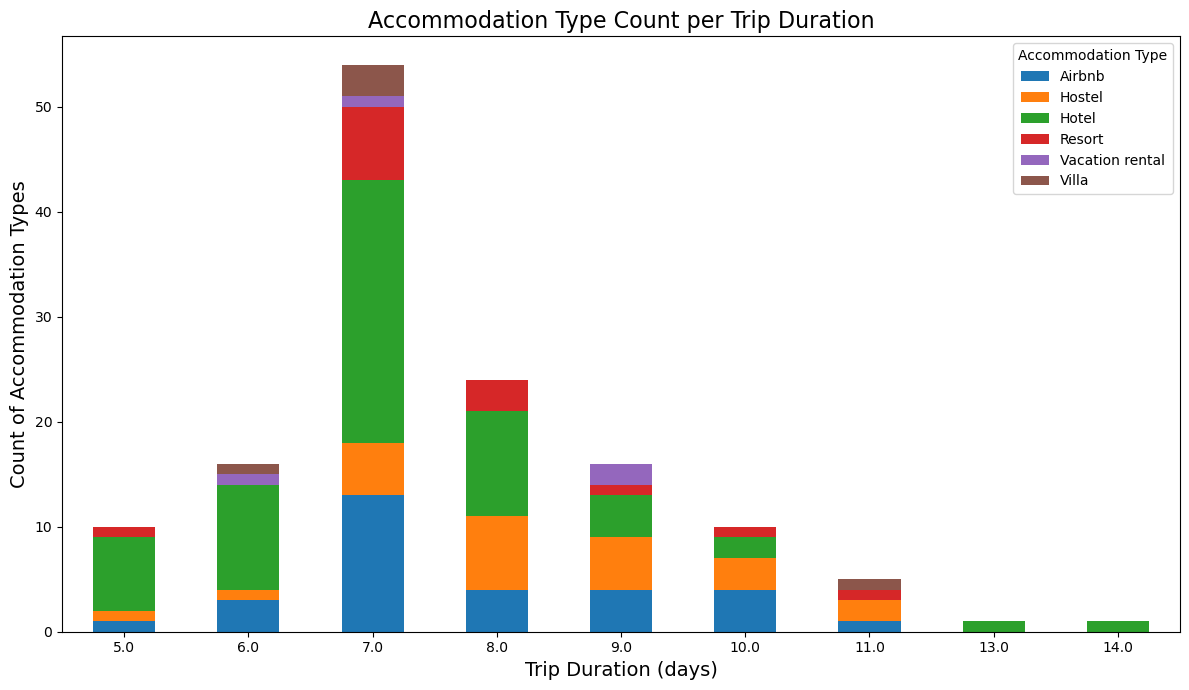

In [90]:
import matplotlib.pyplot as plt

df_pivot = result

plt.figure(figsize=(12, 7))

df_pivot.plot(kind="bar", stacked=True, figsize=(12, 7))

plt.title("Accommodation Type Count per Trip Duration", fontsize=16)
plt.xlabel("Trip Duration (days)", fontsize=14)
plt.ylabel("Count of Accommodation Types", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Accommodation Type")
plt.tight_layout()
plt.show()

In [ ]:
# 4. (count of) transportation_type per traveler_age_segment

In [92]:
import pandas as pd

age_bins = [0, 26, 34, 41, 51, 61, 120]
age_labels = [
    "18-25 Students-Early Professionals",   # [0,26)  -> effectively 18–25 in your data
    "26-33 Young Professionals",            # [26,34)
    "34-40 Young Parents",                  # [34,41)
    "41-50 Money & Energy Group",           # [41,51)
    "51-60 Rich but Tired",                 # [51,61)
    "61+ Retired-Elderly"                   # [61,120)
]

travel_trip_complete_hoaithuong_df["traveler_age_segment"] = pd.cut(
    travel_trip_complete_hoaithuong_df["traveler_age"],
    bins=age_bins,
    labels=age_labels,
    right=False
)

travel_trip_complete_hoaithuong_df["traveler_age_segment"].value_counts()

traveler_age_segment
26-33 Young Professionals             72
34-40 Young Parents                   25
41-50 Money & Energy Group            25
18-25 Students-Early Professionals    13
51-60 Rich but Tired                   2
61+ Retired-Elderly                    0
Name: count, dtype: int64

In [94]:
travel_trip_complete_hoaithuong_df['traveler_age_segment'] = pd.cut(travel_trip_complete_hoaithuong_df['traveler_age'], bins=age_bins, labels=age_labels, right=True)

output = travel_trip_complete_hoaithuong_df[['traveler_age_segment', 'transportation_type']]

print(output)

                   traveler_age_segment transportation_type
0                   34-40 Young Parents              Flight
1             26-33 Young Professionals              Flight
2            41-50 Money & Energy Group              Flight
3             26-33 Young Professionals              Flight
4    18-25 Students-Early Professionals               Train
..                                  ...                 ...
132                 34-40 Young Parents         Private Car
133           26-33 Young Professionals            Airplane
134           26-33 Young Professionals               Train
135  18-25 Students-Early Professionals            Airplane
136                 34-40 Young Parents               Train

[137 rows x 2 columns]


In [99]:
transport_count = pd.crosstab(travel_trip_complete_hoaithuong_df['traveler_age_segment'], travel_trip_complete_hoaithuong_df['transportation_type'])
transport_count

transportation_type,Airplane,Bus,Ferry,Flight,Private Car,Rental Car,Subway,Train
traveler_age_segment,,,,,,,,
18-25 Students-Early Professionals,9,2,0,2,0,2,0,4
26-33 Young Professionals,29,3,1,6,1,9,1,18
34-40 Young Parents,13,1,0,2,1,0,0,11
41-50 Money & Energy Group,10,0,0,3,1,2,0,4
51-60 Rich but Tired,1,0,0,0,0,0,0,1


In [ ]:
#count of transportation_type per traveler_age_segment

<Figure size 1200x700 with 0 Axes>

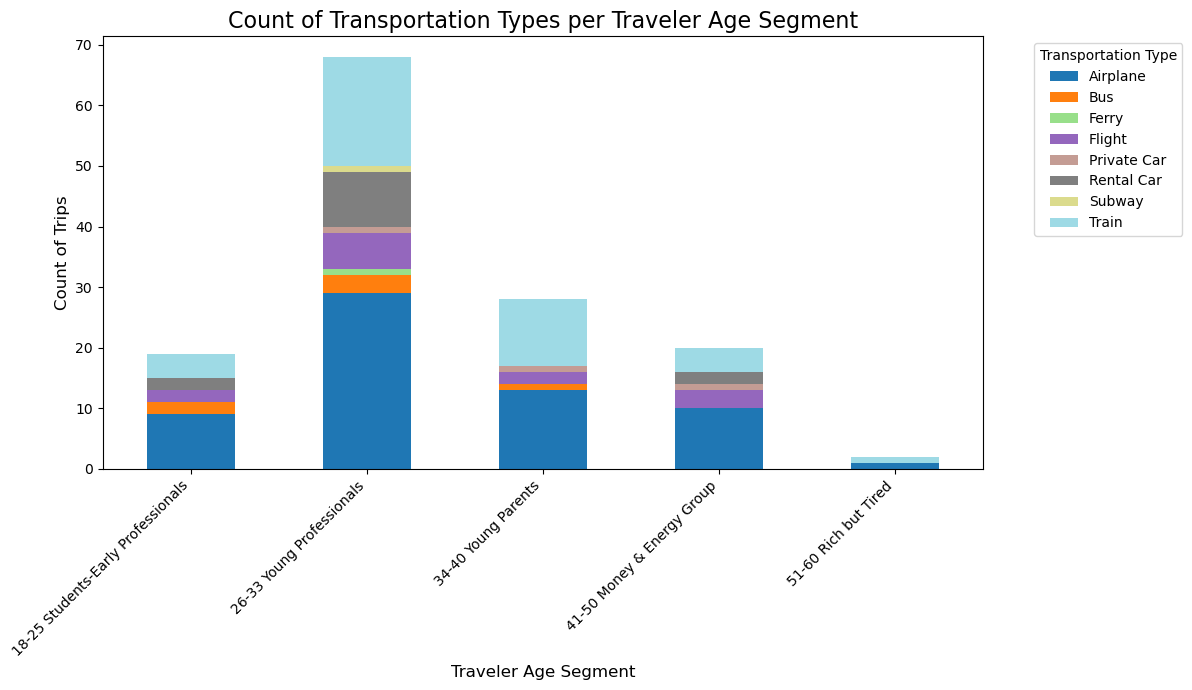

In [100]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Airplane': [9, 29, 13, 10, 1],
    'Bus': [2, 3, 1, 0, 0],
    'Ferry': [0, 1, 0, 0, 0],
    'Flight': [2, 6, 2, 3, 0],
    'Private Car': [0, 1, 1, 1, 0],
    'Rental Car': [2, 9, 0, 2, 0],
    'Subway': [0, 1, 0, 0, 0],
    'Train': [4, 18, 11, 4, 1]
}

index = [
    "18-25 Students-Early Professionals",
    "26-33 Young Professionals",
    "34-40 Young Parents",
    "41-50 Money & Energy Group",
    "51-60 Rich but Tired"
]

transport_df = pd.DataFrame(data, index=index)

plt.figure(figsize=(12, 7))
transport_df.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12,7))

plt.title("Count of Transportation Types per Traveler Age Segment", fontsize=16)
plt.xlabel("Traveler Age Segment", fontsize=12)
plt.ylabel("Count of Trips", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transportation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
--------------------------------------------

In [72]:
# 3. Trip duration correlates with certain accommodation types

In [73]:
duration_stats = travel_trip_complete_hoaithuong_df.groupby('accommodation_type')['duration_days'].agg(['count', 'mean', 'min', 'max']).reset_index()
duration_stats

,accommodation_type,count,mean,min,max
0,Airbnb,30,7.766667,5.0,11.0
1,Hostel,24,8.291667,5.0,11.0
2,Hotel,60,7.216667,5.0,14.0
3,Resort,14,7.714286,5.0,11.0
4,Vacation rental,4,7.750000,6.0,9.0
5,Villa,5,7.600000,6.0,11.0


In [74]:
#Airbnb: 30 trips, average duration ~7.8 days, shortest 5 days, longest 11 days.
#Hostel: 24 trips, average duration ~8.3 days, shortest 5 days, longest 11 days.
#Hotel: 60 trips, average duration ~7.2 days, shortest 5 days, longest 14 days.
#Resort: 14 trips, average duration ~7.7 days, shortest 5 days, longest 11 days.
#Vacation rental: 4 trips, average duration ~7.8 days, shortest 6 days, longest 9 days.
#Villa: 5 trips, average duration ~7.6 days, shortest 6 days, longest 11 days.
#Interpretation: 
    #Hotels have the highest number of trips and the longest maximum duration.
    #Hostels tend to have slightly longer average trips than other accommodations. 
    #Vacation rentals and Villas are less frequent but have moderate durations.

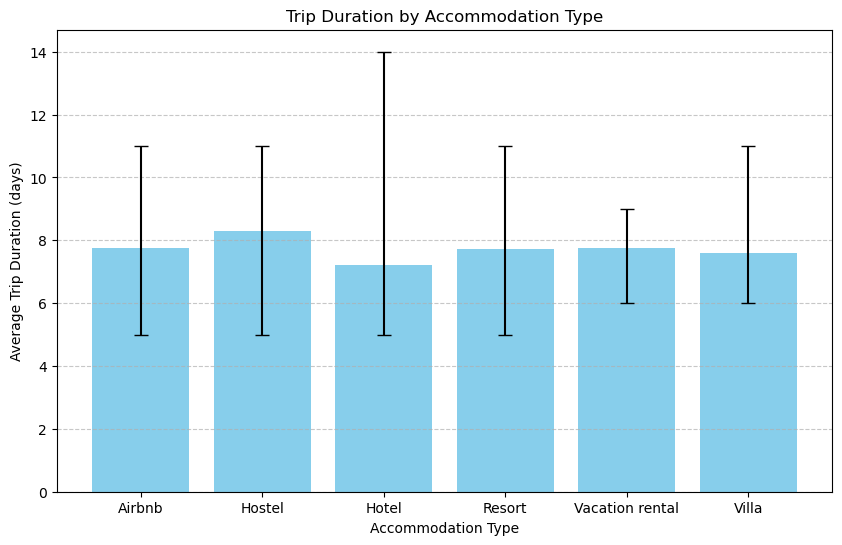

In [75]:
import matplotlib.pyplot as plt
yerr = [duration_stats["mean"] - duration_stats["min"], duration_stats["max"] - duration_stats["mean"]]

plt.figure(figsize=(10,6))
plt.bar(duration_stats["accommodation_type"], duration_stats["mean"], yerr=yerr, capsize=5, color='skyblue')
plt.xlabel("Accommodation Type")
plt.ylabel("Average Trip Duration (days)")
plt.title("Trip Duration by Accommodation Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [76]:
import pandas as pd

age_bins = [0, 26, 34, 41, 51, 61, 120]
age_labels = [
    "18-25 Students-Early Professionals",   # [0,26)  -> effectively 18–25 in your data
    "26-33 Young Professionals",            # [26,34)
    "34-40 Young Parents",                  # [34,41)
    "41-50 Money & Energy Group",           # [41,51)
    "51-60 Rich but Tired",                 # [51,61)
    "61+ Retired-Elderly"                   # [61,120)
]

travel_trip_complete_hoaithuong_df["traveler_age_segment"] = pd.cut(
    travel_trip_complete_hoaithuong_df["traveler_age"],
    bins=age_bins,
    labels=age_labels,
    right=False
)

travel_trip_complete_hoaithuong_df["traveler_age_segment"].value_counts()

traveler_age_segment
26-33 Young Professionals             72
34-40 Young Parents                   25
41-50 Money & Energy Group            25
18-25 Students-Early Professionals    13
51-60 Rich but Tired                   2
61+ Retired-Elderly                    0
Name: count, dtype: int64

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

traveler_age_segment = {
    'Age Segment': [
        '18-25 Students-Early Professionals',
        '26-33 Young Professionals',
        '34-40 Young Parents',
        '41-50 Money & Energy Group',
        '51-60 Rich but Tired',
        '61+ Retired-Elderly'
    ],
    'Count': [13, 72, 25, 25, 2, 0]
}

travel_trip_complete_hoaithuong_df = pd.DataFrame(traveler_age_segment)

travel_trip_complete_hoaithuong_df['Percentage'] = travel_trip_complete_hoaithuong_df['Count'] / travel_trip_complete_hoaithuong_df['Count'].sum() * 100

print(travel_trip_complete_hoaithuong_df)

                          Age Segment  Count  Percentage
0  18-25 Students-Early Professionals     13    9.489051
1           26-33 Young Professionals     72   52.554745
2                 34-40 Young Parents     25   18.248175
3          41-50 Money & Energy Group     25   18.248175
4                51-60 Rich but Tired      2    1.459854
5                 61+ Retired-Elderly      0    0.000000


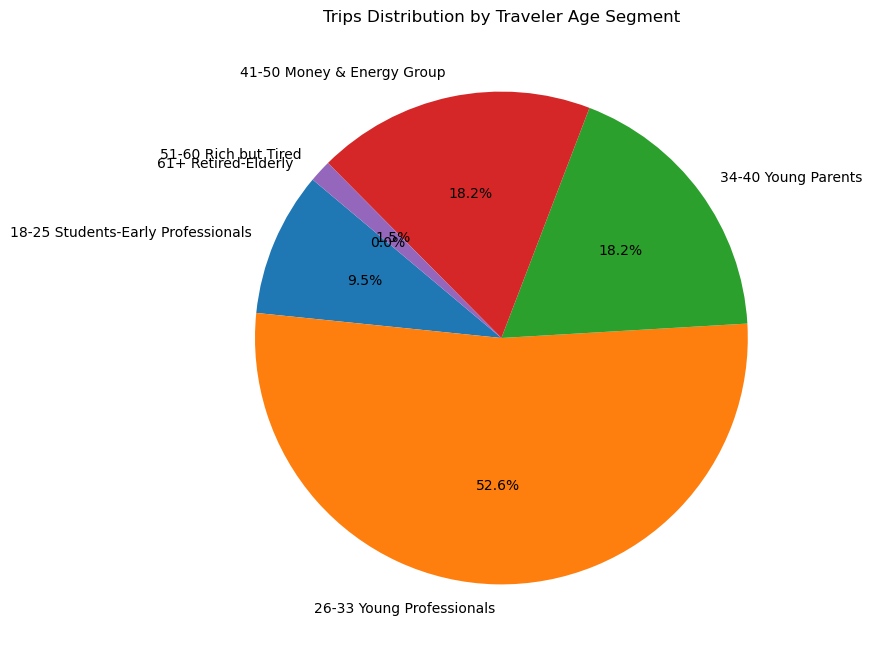

In [78]:
plt.figure(figsize=(8,8))
plt.pie(travel_trip_complete_hoaithuong_df['Count'], labels=travel_trip_complete_hoaithuong_df['Age Segment'], autopct='%1.1f%%', startangle=140)
plt.title("Trips Distribution by Traveler Age Segment")
plt.show()